# **Métricas de similaridade**

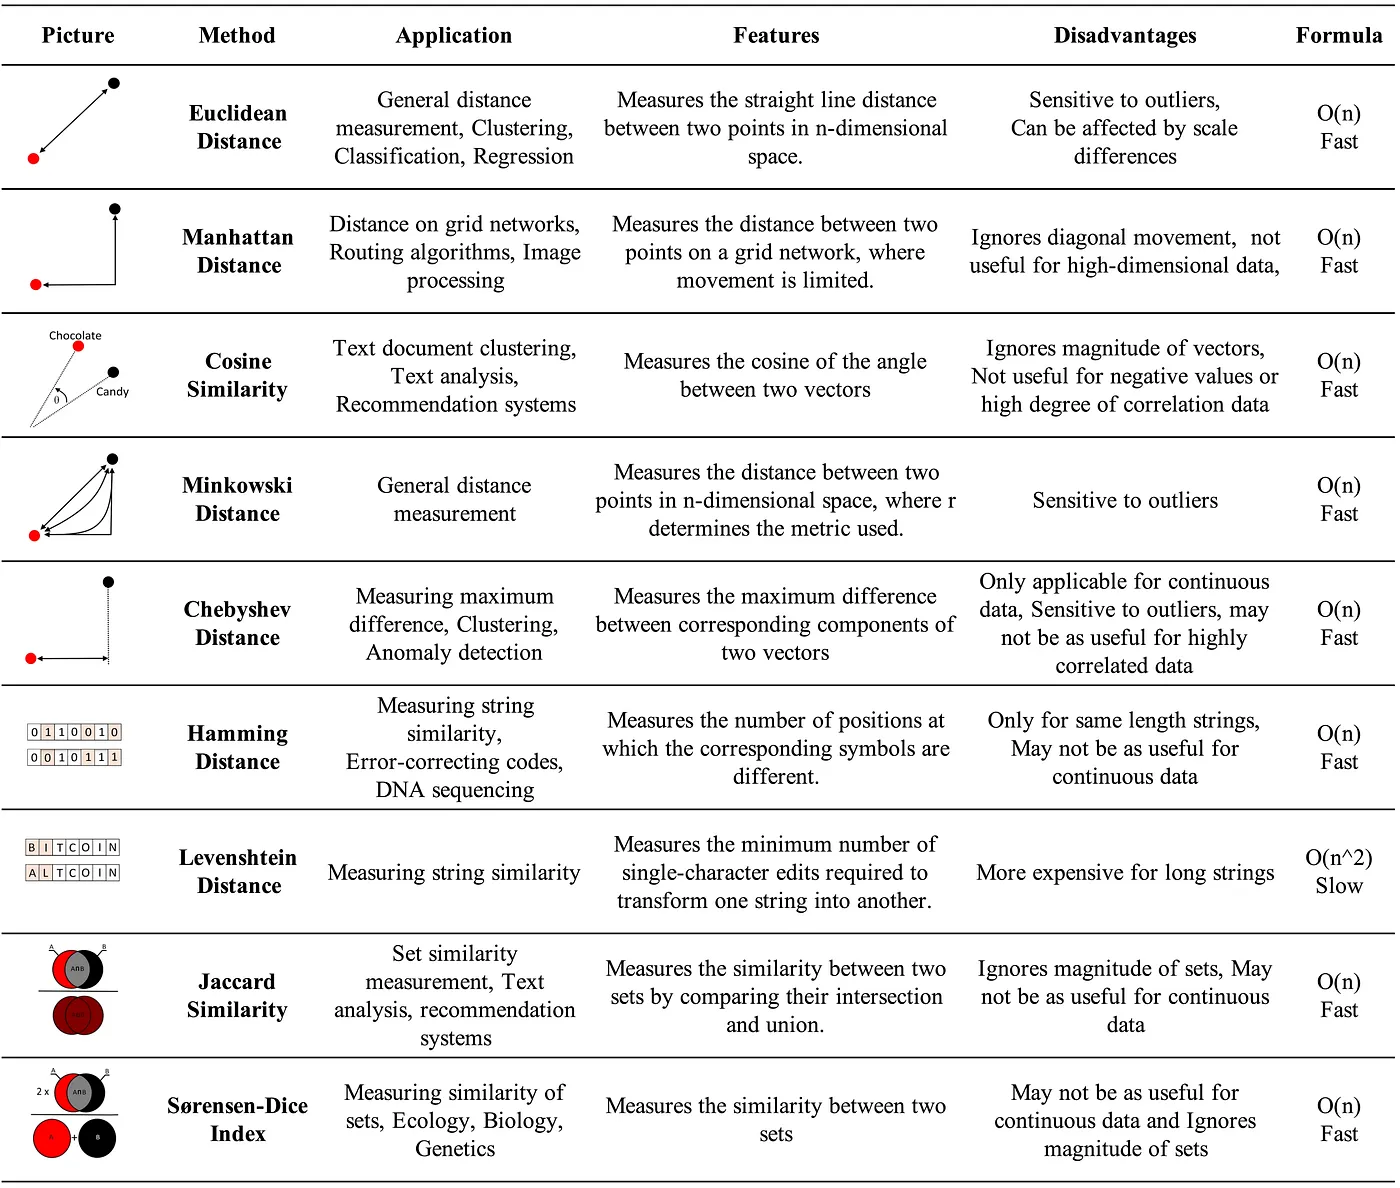

Euclidean distance is the most commonly used distance measure in machine learning and data science. It calculates the straight-line distance between two points in n-dimensional space. Euclidean distance is useful when comparing numerical data that is well-suited to Cartesian coordinates.

Manhattan distance is another commonly used distance measure, particularly when dealing with sparse data, such as in text classification or image recognition. It calculates the distance between two points by summing the absolute differences of their corresponding components.

Cosine similarity is a popular distance measure for comparing the similarity between two vectors. It measures the cosine of the angle between two vectors and is useful when dealing with text data, such as in natural language processing applications.



In [39]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr, spearmanr, chisquare
from scipy.spatial.distance import canberra, cosine, euclidean, minkowski, cityblock, hamming, jaccard, dice, braycurtis
from sklearn.metrics.pairwise import paired_distances
from scipy.special import rel_entr

# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Manhattan distance
def manhattan_distance(p1, p2):
    return np.sum(np.abs(p1 - p2))

# Cosine similarity
def cosine_similarity(p1, p2):
    return 1 - distance.cosine(p1, p2)


In [40]:
point1 = np.array([1, 2])
point2 = np.array([3, 4])
string1 = "hello"
string2 = "hallo"

print("Euclidean distance:", euclidean_distance(point1, point2))
print("Manhattan distance:", manhattan_distance(point1, point2))
print("Cosine similarity:", cosine_similarity(point1, point2))

Euclidean distance: 2.8284271247461903
Manhattan distance: 4
Cosine similarity: 0.9838699100999074


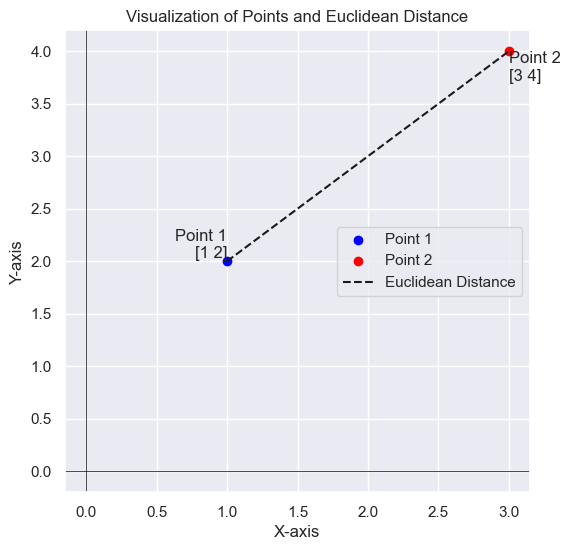

In [41]:
# visualizar os pontos acima usando matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(point1[0], point1[1], color='blue', label='Point 1')
plt.scatter(point2[0], point2[1], color='red', label='Point 2')
# Conectar os pontos para ilustrar a distância euclidiana
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--', label='Euclidean Distance')
# Adicionar anotações e detalhes
plt.text(point1[0], point1[1], f'Point 1\n{point1}', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.text(point2[0], point2[1], f'Point 2\n{point2}', fontsize=12, verticalalignment='top', horizontalalignment='left')
# Configurações do gráfico
plt.title('Visualization of Points and Euclidean Distance')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
# Mostrar o gráfico
plt.show()

In [42]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Unsupervised learning involves models that describe data without reference to any known labels.


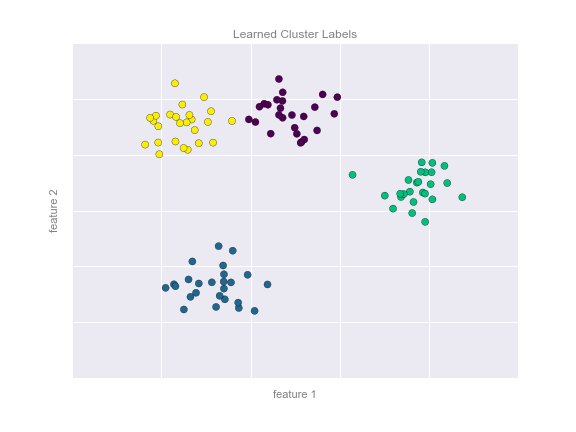

# K-Means

## The “cluster center” is the arithmetic mean of all the points belonging to the cluster.

## Each point is closer to its own cluster center than to other cluster centers.

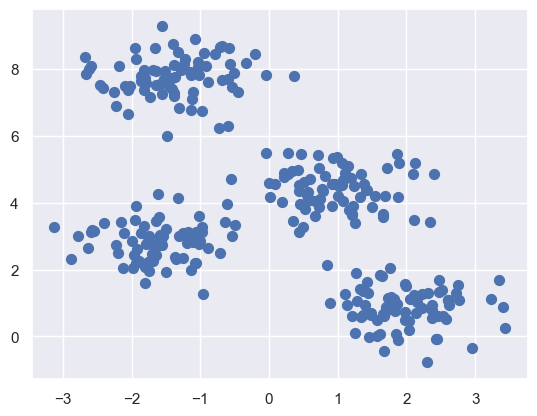

In [44]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                              cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

<h2> k-Means Algorithm: Expectation–Maximization

<h3> Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science. k-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here. In short, the expectation–maximization approach consists of the following procedure:

<h3> Guess some cluster centers

<h3> Repeat until converged

<h3> E-Step: assign points to the nearest cluster center

<h3> M-Step: set the cluster centers to the mean

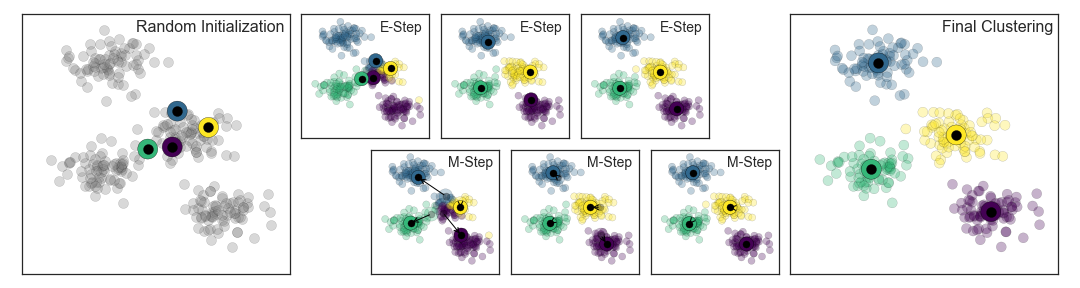

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [46]:
y_kmeans

array([0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2,
       3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0,
       1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3], d

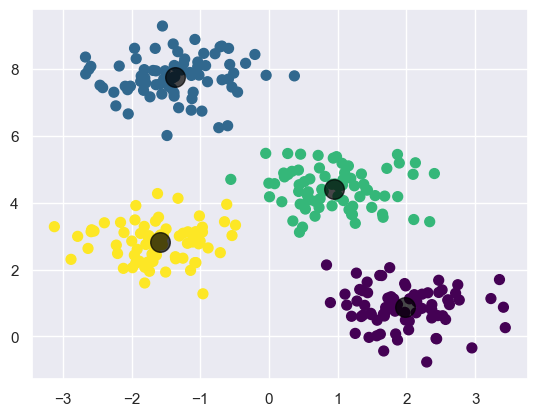

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

# Supondo que não sabemos as classes de vinho, vamos aplicar o k-means para descobrir os agrupamentos.

In [48]:
from sklearn import datasets

In [49]:
#Load dataset
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [50]:
# passar para o formato Dataframe


In [51]:
# visualizar as 5 primeiras linhas


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine.data)
wine.data = scaler.transform(wine.data)
#wine.data = wine.data[:,3:5]
#data
#X_test = scaler.transform(X_test)

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=10)
kmeans.fit(wine.data)
y_kmeans = kmeans.predict(wine.data)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [54]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
# y_m= np.zeros(y_kmeans.size,dtype=int)

# for i in range(y_kmeans.size):
#  if y_kmeans[i] ==2:
#    y_m[i] =1
#  elif y_kmeans[i] ==1:
#    y_m[i] = 0
#  else:
#    y_m[i] =2
# y_m


In [56]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_kmeans, wine.target))

Accuracy: 0.016853932584269662


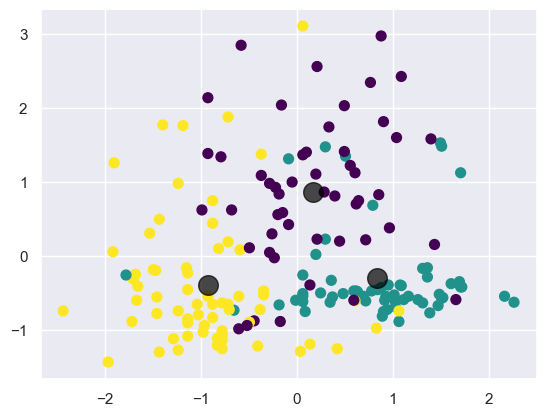

In [57]:

plt.scatter(wine.data[:, 0], wine.data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

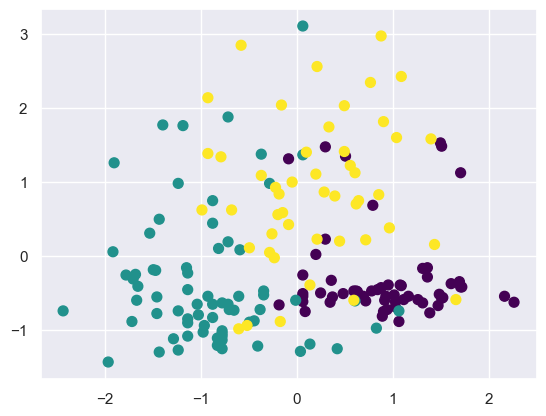

In [58]:
plt.scatter(wine.data[:, 0], wine.data[:, 1], c=wine.target, s=50, cmap='viridis')

<h1> Hierarchical Clustering

<h2> Hierarquia de Clusters

<h2> * Um agrupamento hierárquico agrupa os dados de modo que se dois exemplos são agrupados em algum nível, nos níveis mais acima eles continuam fazendo parte do mesmo grupo.

<h2> * Essa técnica permite analisar os clusters em diferentes níveis de granularidade, pois cada nível do dendograma descreve um conjunto diferente de agrupamentos.

<h1> Abordagem Aglomerativa (Bottom-up)
<h2>
* Esses clusters são recursivamente agrupados considerando alguma medida de similaridade, até que todos os exemplos pertençam a apenas um cluster.

<h2>
* Enquanto houver mais que um grupo:

  * Calcular as distancias entre todos os pares de grupos
  * Substituir o par com menor distancia por um grupo
    * Single linkage
    * Complete linkage
    * Average linkage
    * Wards linkage

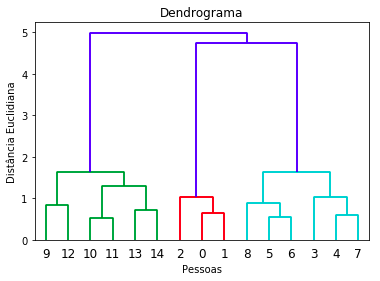

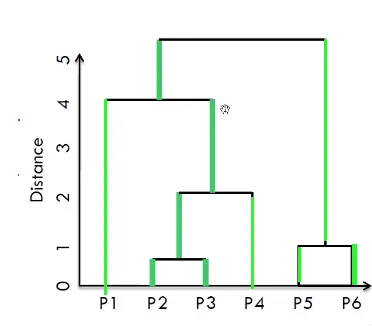

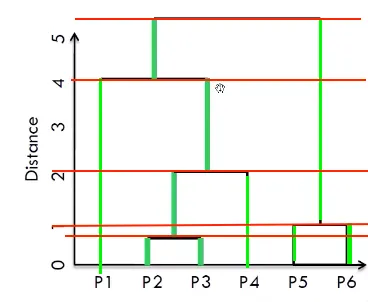

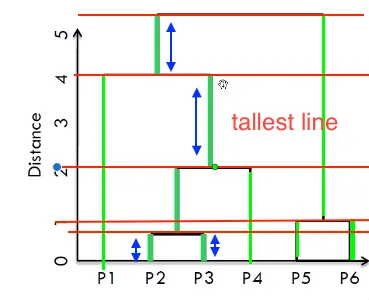

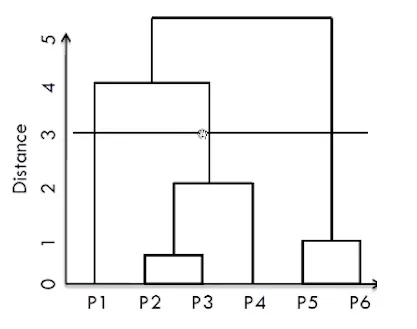

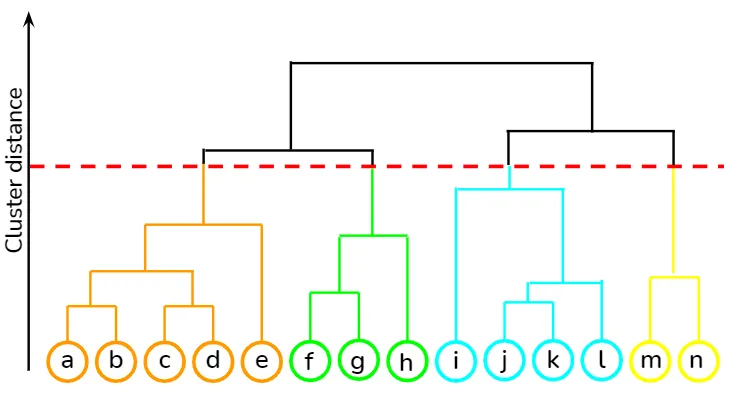

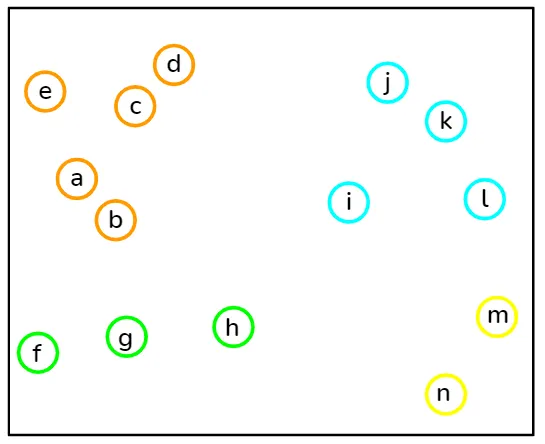

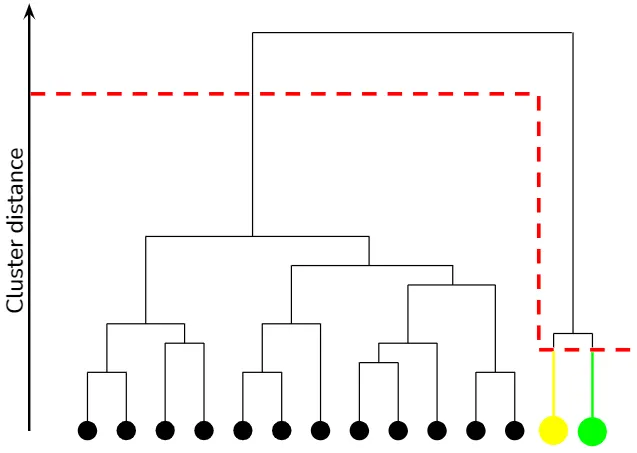

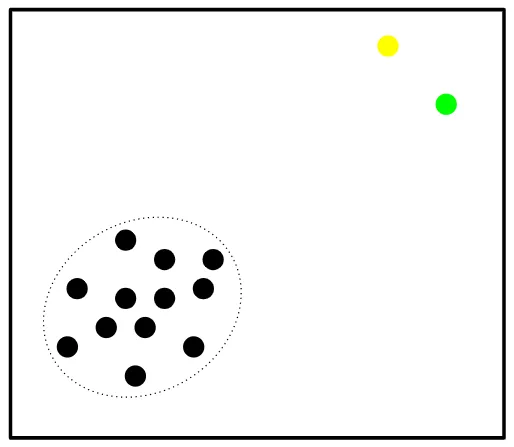

In [59]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Aprendizado%20N%C3%A3o-Supervisionado/shopping-data.csv')

In [60]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [61]:
customer_data['Genre'][0]

'Male'

In [62]:
customer_data.shape

(200, 5)

In [63]:
customer_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [64]:
customer_data.duplicated().sum()

np.int64(0)

In [65]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
customer_data.Genre.map(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
195    <class 'str'>
196    <class 'str'>
197    <class 'str'>
198    <class 'str'>
199    <class 'str'>
Name: Genre, Length: 200, dtype: object

In [67]:

for values in customer_data.Genre.values:
  if (values != 'Male') & (values != 'Female'):
    print(values)


In [68]:
data = customer_data.iloc[:, 3:5].values


In [69]:
data[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

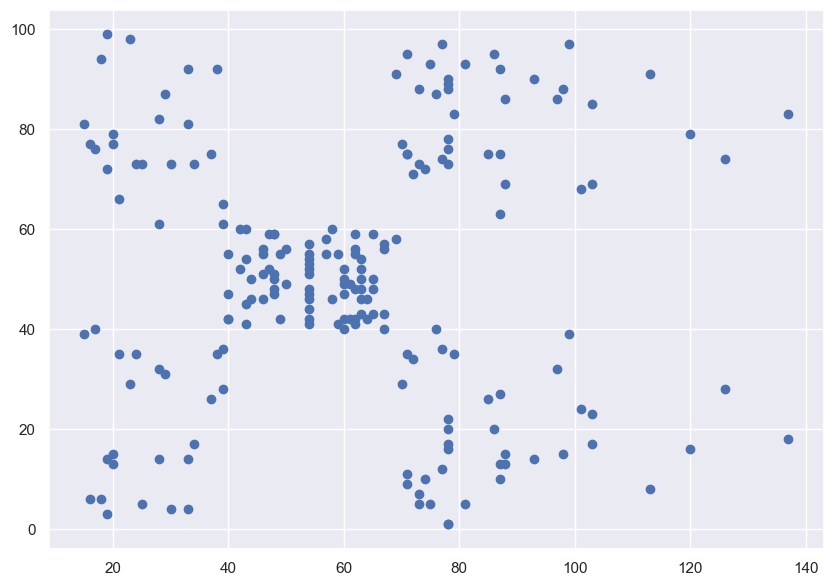

In [70]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1])

In [71]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_t= min_max_scaler.fit_transform(data)
data_t [0:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

In [72]:
#from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(data_t,data_t)
print(dist_matrix)

[[0.         0.42857143 0.33683444 ... 0.97742145 1.0227015  1.09616727]
 [0.42857143 0.         0.76535002 ... 0.91263558 1.18880836 1.00020822]
 [0.33683444 0.76535002 0.         ... 1.13772561 0.99933353 1.26531446]
 ...
 [0.97742145 0.91263558 1.13772561 ... 0.         0.57849818 0.12869934]
 [1.0227015  1.18880836 0.99933353 ... 0.57849818 0.         0.66326531]
 [1.09616727 1.00020822 1.26531446 ... 0.12869934 0.66326531 0.        ]]


In [73]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

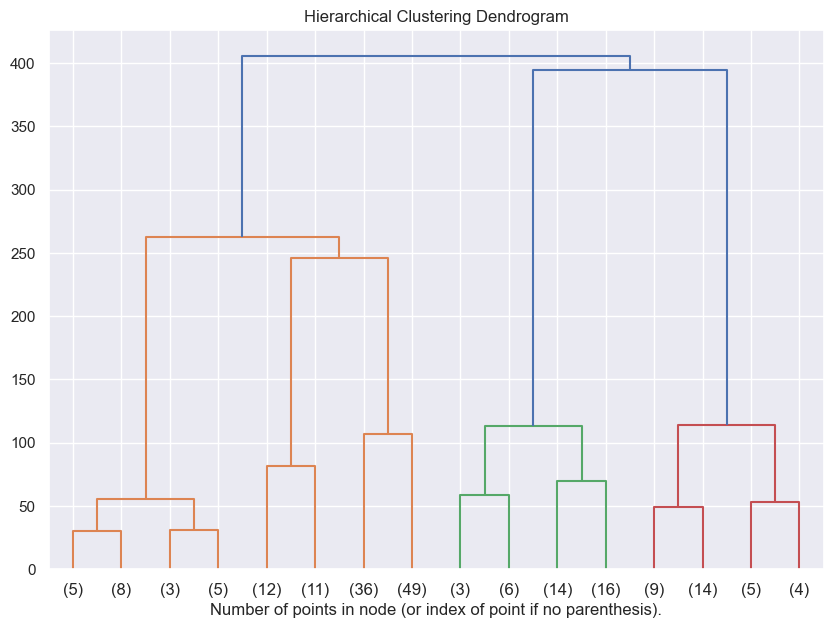

In [74]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [75]:
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data)

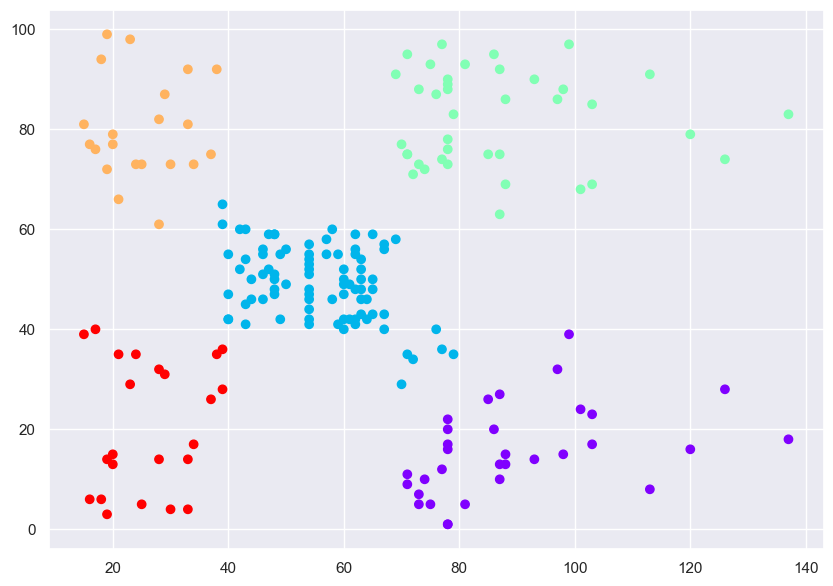

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# The silhouette_score gives the average value for all the samples.

## This gives a perspective into the density and separation of the formed clusters

In [77]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data, cluster_labels)
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5529945955148897


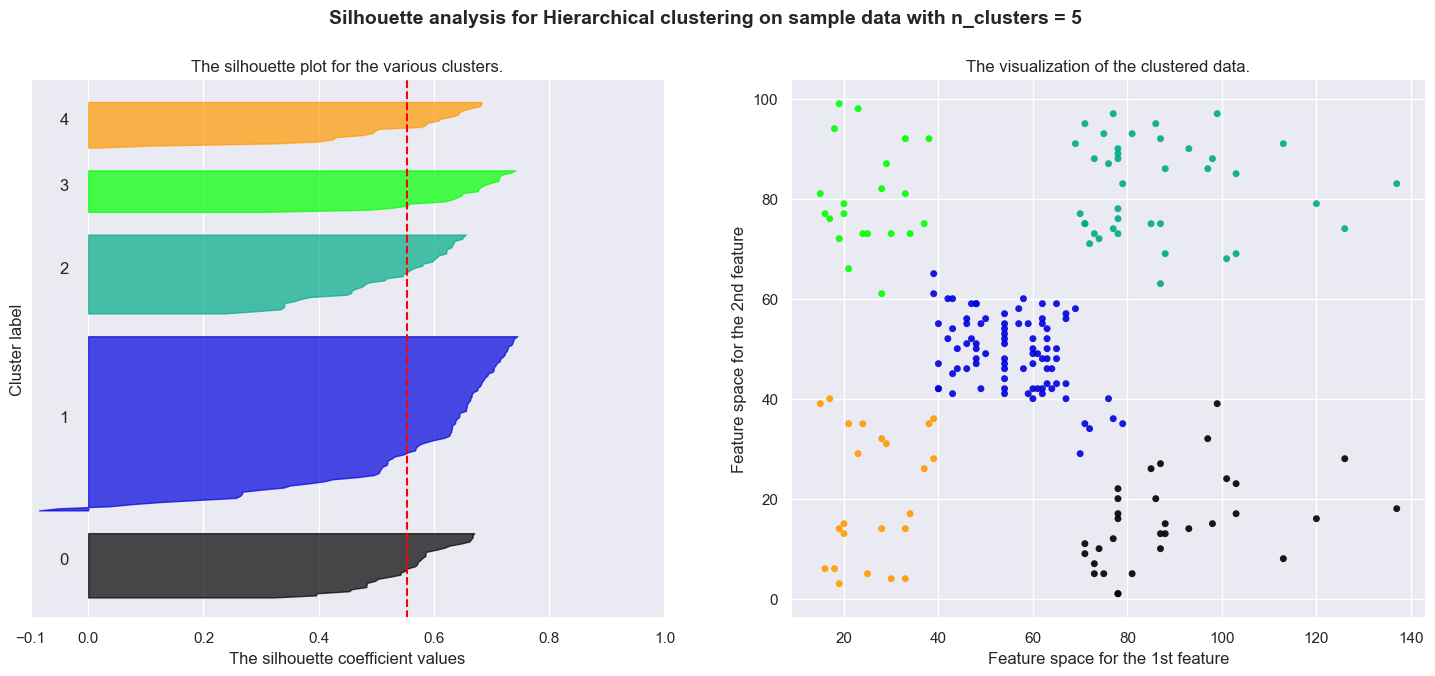

In [78]:
import matplotlib.cm as cm
y_lower = 10
sample_silhouette_values = silhouette_samples(data, cluster_labels)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
for i in range(n_clusters):
  # Aggregate the silhouette scores for samples belonging to
  # cluster i, and sort them
  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

  ith_cluster_silhouette_values.sort()

  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i

  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

  # Label the silhouette plots with their cluster numbers at the middle
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  # Compute the new y_lower for next plot
  y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(data[:, 0], data[:, 1], marker='.', s=100, lw=0, alpha=0.9,c=colors, edgecolor='k')

# Labeling the clusters
#centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
#ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

#for i, c in enumerate(centers):
#    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for Hierarchical clustering on sample data ""with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
plt.show()

<h1> DBSCAN

Density-based Spatial Clustering of Applications with Noise

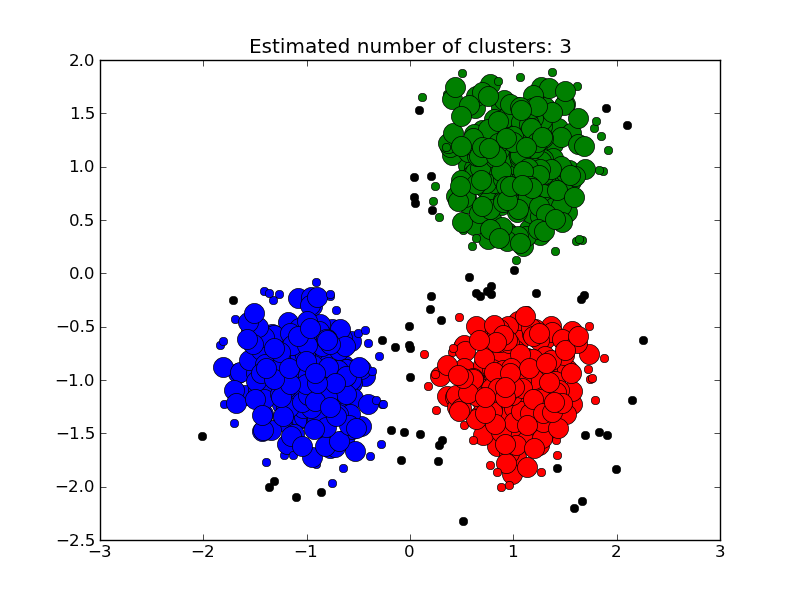

DBSCAN requires two parameters: ε (eps) and the minimum number of points required to form a dense region[a] (minPts). It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster.




* Core point: A selected point is a core point if it has at least minimum number of points (MinPts) including itself within its epsilon-neighborhood. In figure 1, red points are core points that have at least MinPts=4 in their neighborhood. If we’ve a core point, it means it is a dense region.
* Border point: A selected point that is within a neighborhood of a core point but it itself cannot be a core point. In the figure 1, yellow points are identified as border points. If we’ve a border point, it means the point is in a vicinity or at the border of dense region.
* Noise point: A selected point that is neither a core point nor a border point. It means these points are outliers that are not associated with any dense clusters. In the figure 1, blue point is identified as noise point.

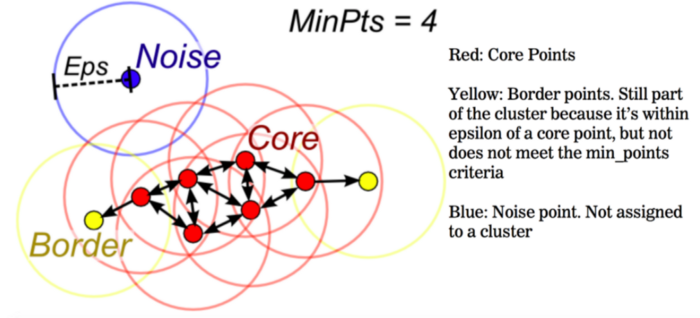

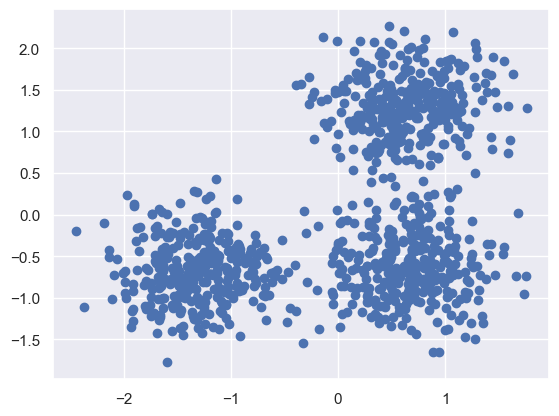

In [79]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples = 1000, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
X
plt.scatter(X[:,0],X[:,1])

In [80]:
db = DBSCAN(eps=0.3, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

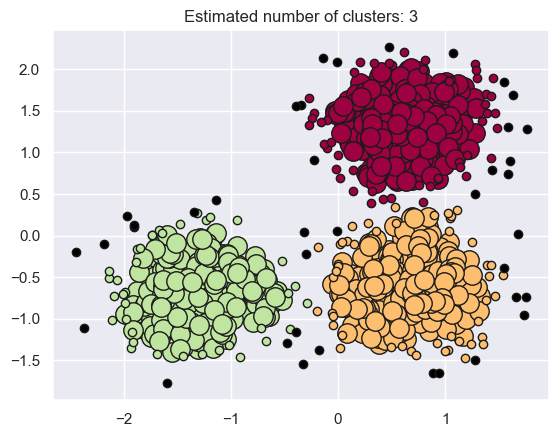

In [81]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [82]:
silhouette_avg = silhouette_score(X, labels)
print("For n_clusters =", n_clusters_,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.5999227100456656


# In particular Rosenberg and Hirschberg (2007) define the following two desirable objectives for any cluster assignment:

* <h2> **homogeneity**: each cluster contains only members of a single class.

* <h2> **completeness**: all members of a given class are assigned to the same cluster.

In [83]:
metrics.homogeneity_score(labels_true, labels)

np.float64(0.9144025521920324)

In [84]:
metrics.completeness_score(labels_true, labels)

np.float64(0.8231234593138913)

https://developers.google.com/machine-learning/clustering/images/ClusteringFlowchart.svg

# K-means - Considerations

Cluster cardinality

Cluster cardinality is the number of examples per cluster. Plot the cluster cardinality for all clusters and investigate clusters that are major outliers.


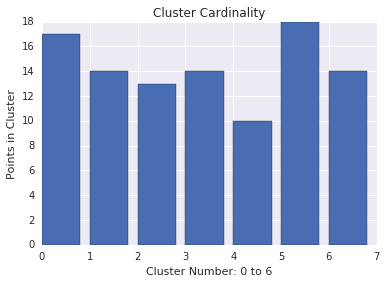

Cluster magnitude

Cluster magnitude is the sum of distances from all examples to the centroid of the cluster. Similar to cardinality, check how the magnitude varies across the clusters, and investigate anomalies.

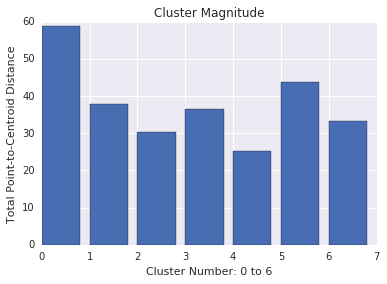

Magnitude vs. Cardinality

Notice that a higher cluster cardinality tends to result in a higher cluster magnitude, which intuitively makes sense. Clusters are anomalous when cardinality doesn't correlate with magnitude relative to the other clusters. Find anomalous clusters by plotting magnitude against cardinality. For example, in Figure below, fitting a line to the cluster metrics shows that cluster number 0 is anomalous.

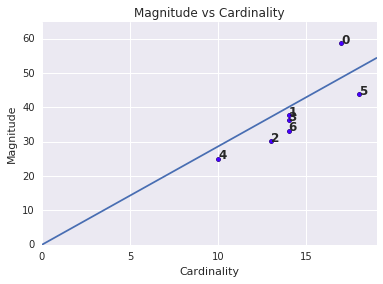